<a href="https://colab.research.google.com/github/chornamarta/ml3.0/blob/main/Module%202/Linear%20Regression/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
medical_df = pd.read_csv('medical-charges.csv')

In [3]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




1.   Пошукати залежності 1 до 1 (тобто якась одна колонка до колоки charges)
2.   Пошукати залежності вже в парі колонок до колонки charges
3.   Будувати графіки :)



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостреження**



*   У чоловіків більша сума `charges`, 3 квартиль для чоловіків 19к в порівянні для жінок 3 квартиль 14.5к
*   Хоча медіана для обох статей однакова
*   Найчастіше сума зборів є до 15к





In [5]:
medical_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

*   Більші `charges` мають жителі південо-східного регіону
*   Медіани у всіх регіонах на одному +- рівні



**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [7]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color='smoker',
                   title='Region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**


*   Найбільше курців з `southeast`, найменше `northwest`
*   Загалом курців набагато менше, ніж не курців по всіх регіонах



**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [8]:
px.violin(medical_df,
          y='charges',
          color='children',
          box=True)

**Спостереження**


*   є багато викидів на кожну кількість дітей
*   Найменший вибір зборів є для людей з 5 людьми, але це може залежити від того що даних про них менше
*   Середня кількість `charges` не виглядає залежною від кількості дітей (приблизно оданкова у всіх)





**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [9]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [10]:
def estimate_charges(age, w, b):
    return w * age + b

In [11]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

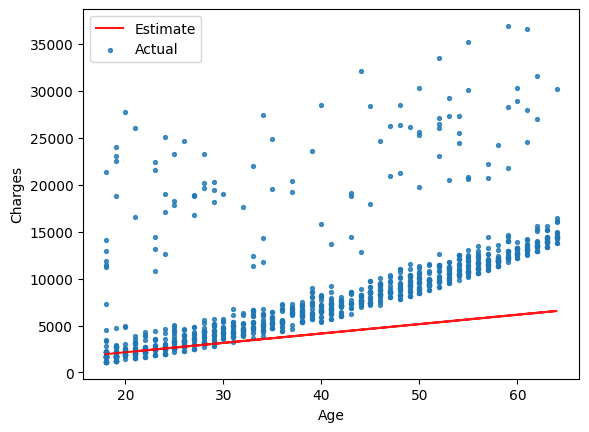

In [12]:
try_parameters(non_smoker_df,100,150)

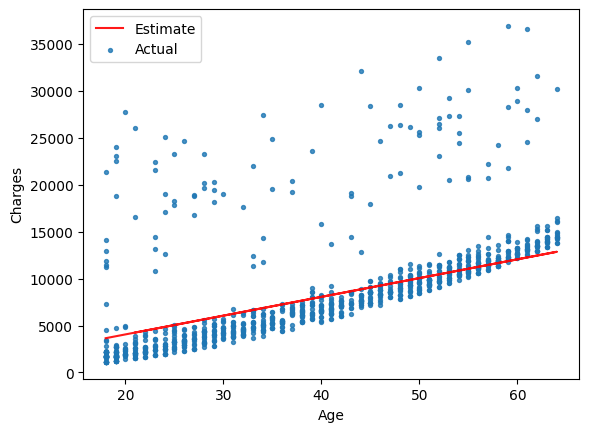

In [13]:
try_parameters(non_smoker_df,200,50)

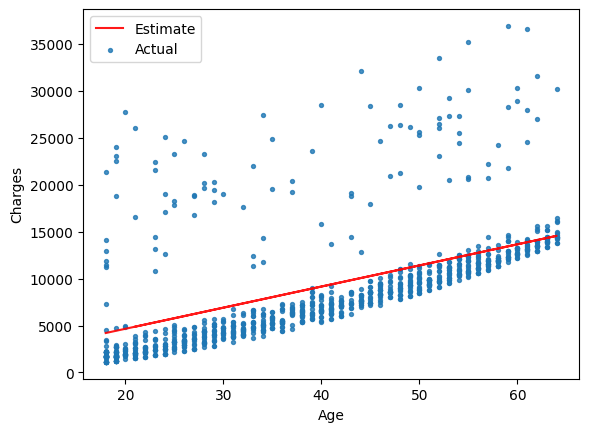

In [14]:
try_parameters(non_smoker_df,225,150)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [15]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [16]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 100, 150)
rmse(targets,predicted)

np.float64(6794.646996002013)

In [17]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 200, 50)
rmse(targets,predicted)

np.float64(4784.595754855185)

In [18]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, 225, 150)
rmse(targets,predicted)

np.float64(4735.619429813915)

**Найнижче значення втрат** - 4735.62

Метод проб і помилок:
- спочатку знайти потрібнй нахил, бо тут чітко видно що лінія не є суто прямою
- потім шукати як рухається по у
- спочатку брати великі значення, щоб відкинут точно не правильні межі для w та b, а потім переходити до меншої різниці між кроками, 100-90-95 і тд